# Problem Set 2: Classical Dynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part A: Diatomic Molecules
### A1: The Lennard-Jones Potential
#### a)

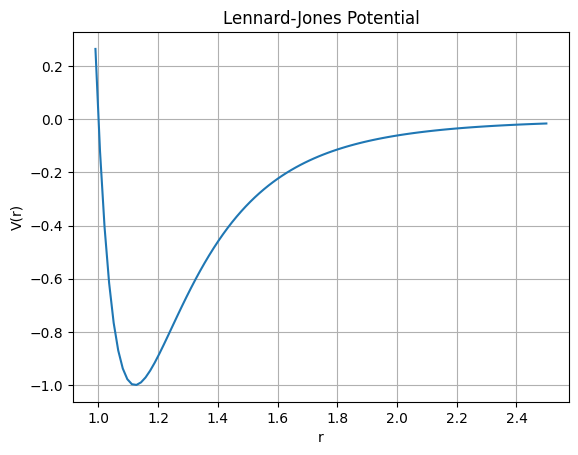

In [2]:
epsilon = 1
sigma = 1

x1 = np.linspace(0.99, 2.5, 100)
potential = 4*epsilon*((sigma/x1)**12 - (sigma/x1)**6)

plt.plot(x1, potential); plt.xlabel('r'); plt.ylabel("V(r)"); plt.title("Lennard-Jones Potential"); plt.grid(); plt.show()

#### b)

![Alt text](Pset02.png)

#### c)

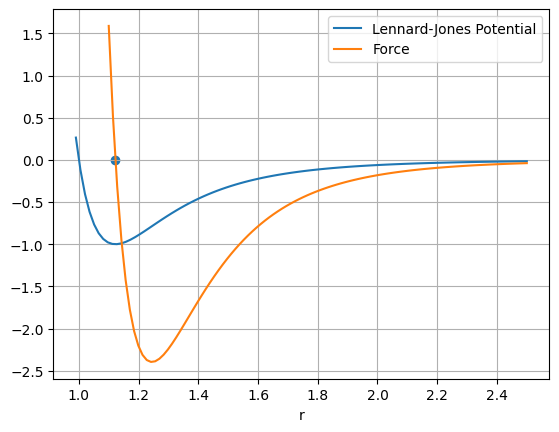

In [3]:
def lj_force(r, epsilon = 1.0, sigma = 1.0):
    return -(24*(((epsilon*(sigma**6))/r**7) - (2*epsilon*(sigma**12))/r**13))

epsilon = 1.0
sigma = 1.0

x2 = np.linspace(1.1, 2.5, 100)
Force = lj_force(x2)

#x1 and potential are from the last question
plt.plot(x1, potential, label="Lennard-Jones Potential") 
plt.plot(x2, Force, label="Force")
plt.scatter(1.1225,0)
plt.xlabel('r');plt.legend();plt.grid();plt.show()

#### d)
#### The atoms will seperate from one another intially if we start them at r = 1 until they reach the bottom of the well. The sign of the force between them at this point is negative. This is not consistent with my first statement because a negative force will act to bring the atoms closer together.

### A2: Dynamics
#### a)

In [4]:
def velocity_verlet(r0, v0, h, m, end_t, epsilon = 1.0, sigma = 1.0):
    r = [r0]
    v = [v0]
    t = [0]
    while t[-1] < end_time - 2*h:
        Fr = -(24*(((epsilon*(sigma**6))/r[-1]**7) - (2*epsilon*(sigma**12))/r[-1]**13))
        r_new = r[-1] + (h*v[-1]) + (((h**2)*Fr)/(2*m)) #step 1
        r.append(r_new)
        Fr_new = -(24*(((epsilon*(sigma**6))/r[-1]**7) - (2*epsilon*(sigma**12))/r[-1]**13)) #step 2
        v_new = v[-1] + ((h/2*m)*(Fr + Fr_new)) #step 3
        v.append(v_new)
        t.append(t[-1] + h)
    return t, r, v

r0 = 2 
v0 = -0.1
h = 0.02
m = 1
end_time = 10

t,r,v = velocity_verlet(r0, v0, h, m, end_time)

#### b)

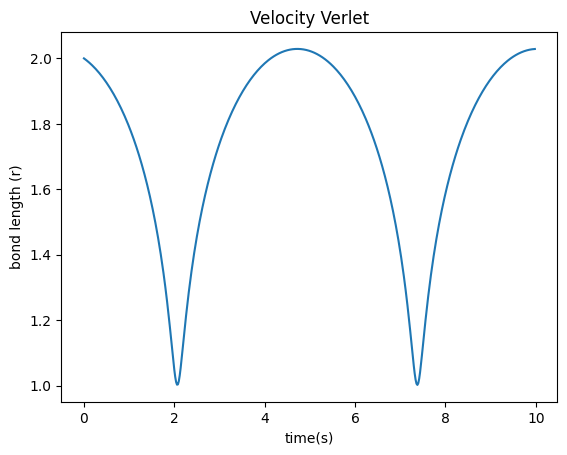

In [5]:
plt.plot(t, r)
plt.xlabel("time(s)");plt.ylabel("bond length (r)");plt.title("Velocity Verlet");plt.show()

The curve is more sharp for the small radius because the derivative's magnitude of the potential around this point is larger than at large radii.

## A3: Conservation of Energy
#### a)

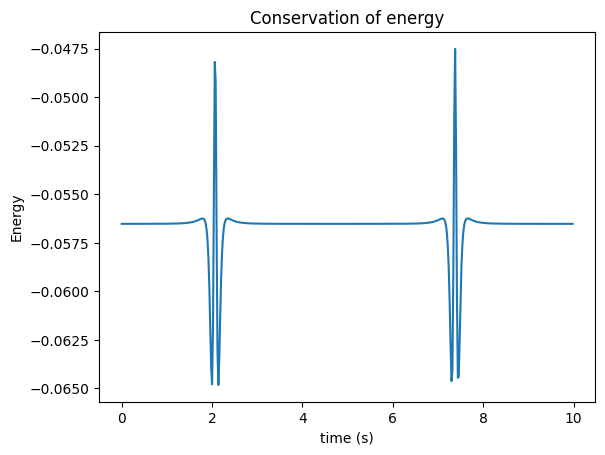

In [6]:
r0 = 2 
v0 = -0.1
h = 0.02
m = 1
end_time = 10
t,r,v = velocity_verlet(r0, v0, h, m, end_time)

def energy_of_system(t, m, v):
    energy = list()
    epsilon = 1.0
    sigma = 1.0
    for i in range(0, len(t)):
        energy_new = (1/2)*m*(v[i]**2)+ 4*epsilon*((sigma/r[i])**12 - (sigma/r[i])**6)
        energy.append(energy_new)    
    return energy

energy = energy_of_system(t, m, v)

plt.plot(t, energy);plt.xlabel("time (s)");plt.ylabel("Energy");plt.title("Conservation of energy");plt.show() 

#### b)

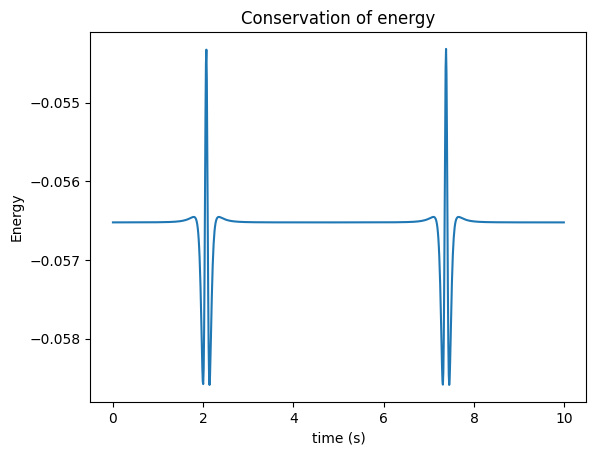

In [7]:
r0 = 2 
v0 = -0.1
h = 0.01
m = 1
end_time = 10

t,r,v = velocity_verlet(r0, v0, h, m, end_time)

energy = energy_of_system(t, m, v)

plt.plot(t, energy);plt.xlabel("time (s)");plt.ylabel("Energy");plt.title("Conservation of energy");plt.show() 

#### The error in energy and step size have a normal relationship.
#### c)

Text(0.5, 1.0, 'Conservation of energy')

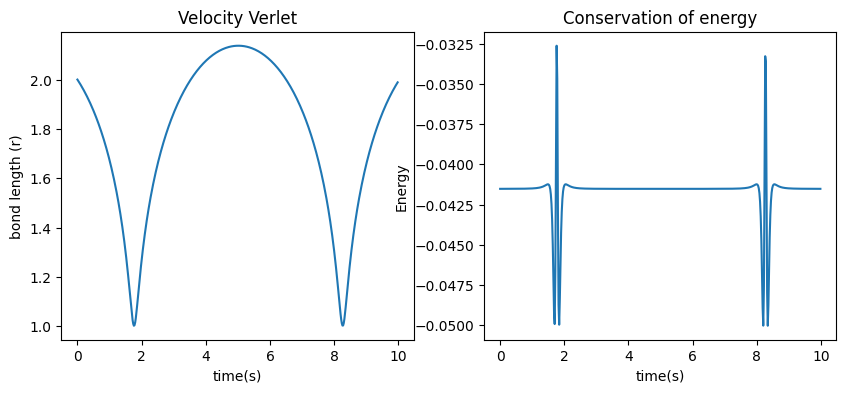

In [8]:
r0 = 2 
v0 = -0.2
h = 0.02
m = 1
end_time = 10

t,r,v = velocity_verlet(r0, v0, h, m, end_time)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(t, r)
axs[0].set_xlabel("time(s)");axs[0].set_ylabel("bond length (r)");axs[0].set_title("Velocity Verlet")

energy = energy_of_system(t, m, v)

axs[1].plot(t, energy);axs[1].set_xlabel("time(s)");axs[1].set_ylabel("Energy");axs[1].set_title("Conservation of energy")

Text(0.5, 1.0, 'Conservation of energy')

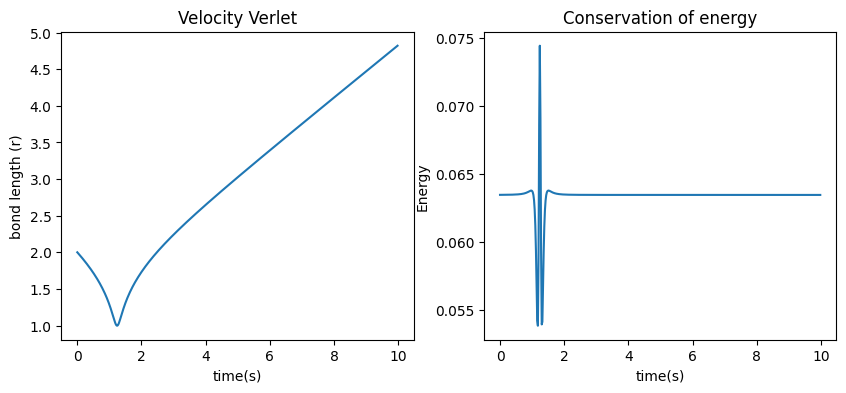

In [9]:
r0 = 2 
v0 = -0.5
h = 0.02
m = 1
end_time = 10

t,r,v = velocity_verlet(r0, v0, h, m, end_time)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(t, r)
axs[0].set_xlabel("time(s)");axs[0].set_ylabel("bond length (r)");axs[0].set_title("Velocity Verlet")

energy = energy_of_system(t, m, v)

axs[1].plot(t, energy);axs[1].set_xlabel("time(s)");axs[1].set_ylabel("Energy");axs[1].set_title("Conservation of energy")

#### When  you increase the energy of the system, the bond breaks. This is why we see the bond length increase linearly.
## Part B: Triatomic reaction dynamics with Lennard-Jones potentials
### B1: The Lennard-Jones potential
#### a)

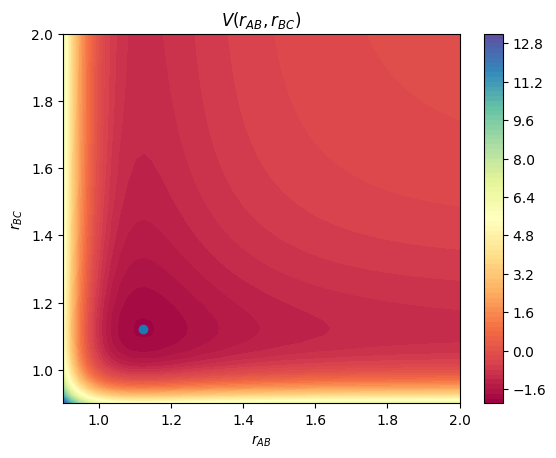

In [10]:
r_AB = np.linspace(0.9,2.0)
r_BC = np.linspace(0.9,2.0)

def V(r, epsilon=1, sigma=1):
    potential = 4*epsilon*((sigma/r)**12 - (sigma/r)**6)
    return potential


rAB, rBC,= np.meshgrid(r_AB, r_BC)
    
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)

plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
r_min = 2**(1/6)
plt.scatter(r_min,r_min)

plt.title('$V(r_{AB}, r_{BC})$')
plt.xlabel('$r_{AB}$')
plt.ylabel('$r_{BC}$')
plt.show()

##### The configuration of the atoms that gives the minimum potential would be when r_AB = r_BC = 2**(1/6).
#### b)

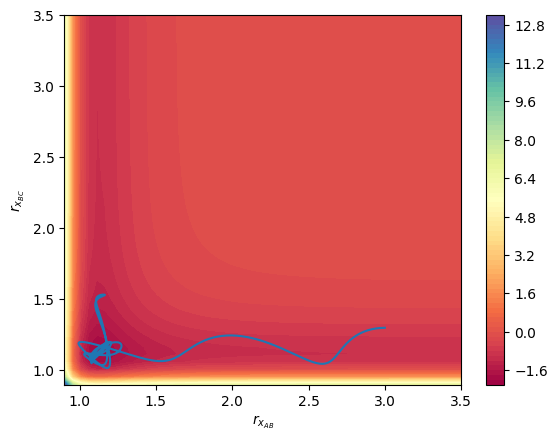

In [110]:
def bond_lengths(particle_index, pos):
    r = [[0 for _ in range(len(pos))] for _ in range(len(pos))]
    for j in range(len(pos)):
        xij = pos[particle_index][0][-1] - pos[j][0][-1]
        yij = pos[particle_index][1][-1] - pos[j][1][-1]
        zij = pos[particle_index][2][-1] - pos[j][2][-1]
        r[particle_index][j] = np.sqrt(xij**2 + yij**2 + zij**2)
    return r    

def lj_3d(particle_index, pos, r, sigma=1.0, epsilon=1.0):
    #the force vector containing all 3D forces acting on a specified particle
    f = [0, 0, 0]
    for i in range(len(pos)):
        if i != particle_index and r[particle_index][i] != 0:
                f[0] += -(pos[particle_index][0][-1] - pos[i][0][-1])*((24*epsilon*(sigma**6))/(r[particle_index][i]**8))*(1 - 2*((sigma/r[particle_index][i])**6))
                f[1] += -(pos[particle_index][1][-1] - pos[i][1][-1])*((24*epsilon*(sigma**6))/(r[particle_index][i]**8))*(1 - 2*((sigma/r[particle_index][i])**6))
                f[2] += -(pos[particle_index][2][-1] - pos[i][2][-1])*((24*epsilon*(sigma**6))/(r[particle_index][i]**8))*(1 - 2*((sigma/r[particle_index][i])**6)) 
    return f

def multiple_atoms_Verlet(pos, vel, h, end_time, m):
    t = [0]
    # r = [[0 for _ in range(len(pos))] for _ in range(len(pos))]
    
    while t[-1] < end_time:
        for i in range(len(pos)):
            #Compute all of our r_ij b/c we need them for computing F
            r = bond_lengths(i, pos)
            f = lj_3d(i, pos, r)
            
            # step 1: calculate
            pos[i][0].append(pos[i][0][-1] + (h*vel[i][0][-1]) + (((h**2)*f[0])/(2*m[i])))#x1(k+1)
            pos[i][1].append(pos[i][1][-1] + (h*vel[i][1][-1]) + (((h**2)*f[1])/(2*m[i])))#y1(k+1)
            pos[i][2].append(pos[i][2][-1] + (h*vel[i][2][-1]) + (((h**2)*f[2])/(2*m[i])))#z1(k+1)

        # step 2: evaluate        
        for i in range(len(pos)):
            # Because we have computed new positions for each particle, we must re-compute our new bond lengths.
            r = bond_lengths(i, pos)
            f_new = lj_3d(i, pos, r)
            # step 3: calculate
            vel[i][0].append(vel[i][0][-1] + ((h/(2*m[i])) * (f[0] + f_new[0])))
            vel[i][1].append(vel[i][1][-1] + ((h/(2*m[i])) * (f[1] + f_new[1])))
            vel[i][2].append(vel[i][2][-1] + ((h/(2*m[i])) * (f[2] + f_new[2])))
        t.append(t[-1] + h)
    return t, pos, vel
            
A = [[-3.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
C = [[1.3], [0.0], [0.0]]
pos = [A, B, C]
A_v = [[1.0], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
C_v = [[0.0], [0.0], [0.0]]
vel = [A_v, B_v, C_v]
h = 0.01 # homework step size diverges ?
m = [1, 1, 1]
end_time = 10

t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)

A_x = np.array(pos[0][0])
B_x = np.array(pos[1][0])
C_x = np.array(pos[2][0])

r_AB_x = np.abs(A_x - B_x)
r_BC_x = np.abs(B_x - C_x)
r_AC_x = np.abs(A_x - C_x)

r_AB = np.linspace(0.9,3.5)
r_BC = np.linspace(0.9,3.5)
rAB, rBC,= np.meshgrid(r_AB, r_BC)
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)
plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
plt.plot(r_AB_x, r_BC_x)
plt.xlabel("$r_{x_{AB}}$");plt.ylabel("$r_{x_{BC}}$");plt.show()

##### These starting conditions are preparation for simulating what happens when particle with an intial velocity interacts with a pair of bonded particles in a 1-dimensional plane.

#### c)

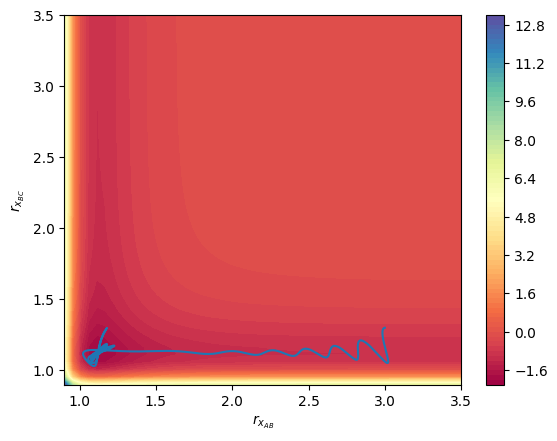

In [72]:
A = [[-3.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
C = [[1.3], [0.0], [0.0]]
pos = [A, B, C]
A_v = [[0.2], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
C_v = [[0.0], [0.0], [0.0]]
vel = [A_v, B_v, C_v]
h = 0.02
m = [1, 1, 1]
end_time = 15

t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)

A_x = np.array(pos[0][0])
B_x = np.array(pos[1][0])
C_x = np.array(pos[2][0])

r_AB_x = np.abs(A_x - B_x)
r_BC_x = np.abs(B_x - C_x)
r_AC_x = np.abs(A_x - C_x)

r_AB = np.linspace(0.9,3.5)
r_BC = np.linspace(0.9,3.5)
rAB, rBC,= np.meshgrid(r_AB, r_BC)
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)
plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
plt.plot(r_AB_x, r_BC_x)
plt.xlabel("$r_{x_{AB}}$");plt.ylabel("$r_{x_{BC}}$");plt.show()

#### d)

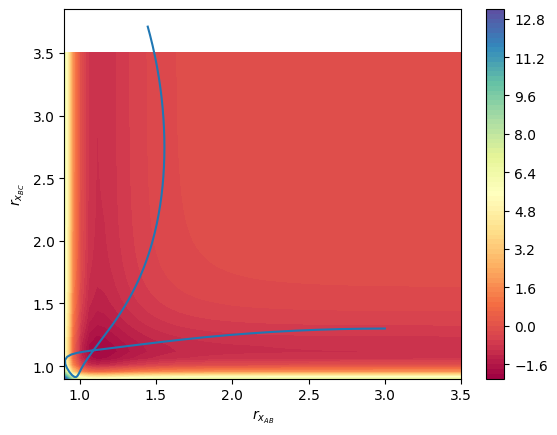

In [114]:
A = [[-3.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
C = [[1.3], [0.0], [0.0]]
pos = [A, B, C]
A_v = [[5.0], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
C_v = [[0.0], [0.0], [0.0]]
vel = [A_v, B_v, C_v]
h = 0.01
m = [1, 1, 1]
end_time = 2

t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)

A_x = np.array(pos[0][0])
B_x = np.array(pos[1][0])
C_x = np.array(pos[2][0])

r_AB_x = np.abs(A_x - B_x)
r_BC_x = np.abs(B_x - C_x)
r_AC_x = np.abs(A_x - C_x)

r_AB = np.linspace(0.9,3.5)
r_BC = np.linspace(0.9,3.5)
rAB, rBC,= np.meshgrid(r_AB, r_BC)
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)
plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
plt.plot(r_AB_x, r_BC_x)
plt.xlabel("$r_{x_{AB}}$");plt.ylabel("$r_{x_{BC}}$");plt.show()

With a time step of h = 0.01, the simulations look better for me. Why is this?